In [2]:
import numpy as np
import pandas as pd
import math 
from scipy import stats 
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
ds=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/SMDM/Project/Wholesale+Customers+Data.csv')
ds.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
ds.info

<bound method DataFrame.info of      Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
0                1  Retail  Other  12669   9656     7561     214   
1                2  Retail  Other   7057   9810     9568    1762   
2                3  Retail  Other   6353   8808     7684    2405   
3                4   Hotel  Other  13265   1196     4221    6404   
4                5  Retail  Other  22615   5410     7198    3915   
..             ...     ...    ...    ...    ...      ...     ...   
435            436   Hotel  Other  29703  12051    16027   13135   
436            437   Hotel  Other  39228   1431      764    4510   
437            438  Retail  Other  14531  15488    30243     437   
438            439   Hotel  Other  10290   1981     2232    1038   
439            440   Hotel  Other   2787   1698     2510      65   

     Detergents_Paper  Delicatessen  
0                2674          1338  
1                3293          1776  
2                3516          7844  

In [1099]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 440 rows and 9 columns in the dataset


In [5]:
ds.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [1086]:
ds.isnull().any()

Buyer/Spender       False
Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool

In [87]:
region=ds['Region'].value_counts()
channel=ds['Channel'].value_counts()
print('Total values in region:\n',region.to_string())
print('Total values in channels:\n',channel.to_string())

Total values in region:
 Other     316
Lisbon     77
Oporto     47
Total values in channels:
 Hotel     298
Retail    142


# Question1.1 Use methods of descriptive statistics to summarize data.    Which Region and which Channel seems to spend more?                            Which Region and which Channel seems to spend less?

In [169]:
region_sum = ds.groupby('Region').sum().reset_index()
region_sum.head()

,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,18095,854833,422454,570037,231026,204136,104327
1,Oporto,14899,464721,239144,433274,190132,173311,54506
2,Other,64026,3960577,1888759,2495251,930492,890410,512110


In [ ]:
#With the above calculation we can see that the expenditure(spend) in 'Other' Region is highest than the expenditure in 'Lisbon' channel and the 'Oporto' is the Region with least expenditure.

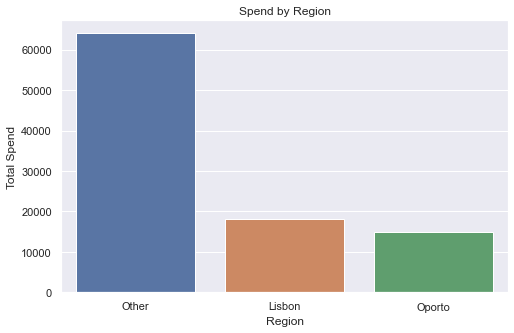

In [144]:
plt.figure(figsize=(8,5))
graph=sns.barplot(x='Region',y="Buyer/Spender",data=region_sum,order=ds['Region'].value_counts().index)
plt.ylabel('Total Spend')
plt.title('Spend by Region')
plt.show()


In [ ]:
#From above graph we observe that the expenditure in 'Other' region has the highest expenditure and 'Lisbon' region falls in second place and 'Orpoto' region falls in last place with expenditure.

In [130]:
channel_sum = ds.groupby('Channel').sum().reset_index()
channel_sum.head()

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [ ]:
#With above calculation we observe that the expenditure in 'Hotel' Channel is expenditure than the expenditure in 'Retail' channel.

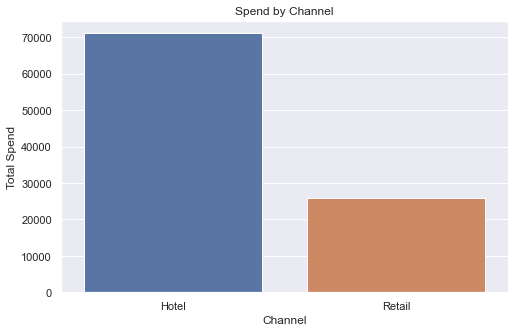

In [145]:
plt.figure(figsize=(8,5))
graph=sns.barplot(x='Channel',y="Buyer/Spender",data=channel_sum,order=ds['Channel'].value_counts().index)
plt.ylabel('Total Spend')
plt.title('Spend by Channel')
plt.show()

In [147]:
#From above graph we observe that the expenditure in 'Hotel' Channel is more than the total expenditure in 'Retail' channel.

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [151]:
desc = ds["Channel"].describe()
desc

count       440
unique        2
top       Hotel
freq        298
Name: Channel, dtype: object

In [164]:
ds.groupby(["Channel","Region"]).mean()

Buyer/Spender         Fresh          Milk       Grocery  \
Channel Region                                                            
Hotel   Lisbon     237.728814  12902.254237   3870.203390   4026.135593   
        Oporto     321.000000  11650.535714   2304.250000   4395.500000   
        Other      227.582938  13878.052133   3486.981043   3886.734597   
Retail  Lisbon     226.055556   5200.000000  10784.000000  18471.944444   
        Oporto     311.105263   7289.789474   9190.789474  16326.315789   
        Other      152.438095   9831.504762  10981.009524  15953.809524   

                     Frozen  Detergents_Paper  Delicatessen  
Channel Region                                               
Hotel   Lisbon  3127.322034        950.525424   1197.152542  
        Oporto  5745.035714        482.714286   1105.892857  
        Other   3656.900474        786.682464   1518.284360  
Retail  Lisbon  2584.111111       8225.277778   1871.944444  
        Oporto  1540.578947       8410.263158   1239.000000  
        Other   1513.200000       6899.238095   1826.209524

Text(0.5, 1.0, 'Fresh')

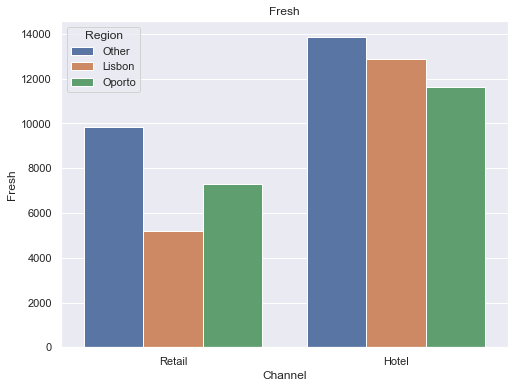

In [200]:
plt.figure(figsize=(8,6))
sns.barplot(x="Channel", y="Fresh", hue ="Region", ci=None, data=ds)
plt.title('Fresh')

Text(0.5, 1.0, 'Milk')

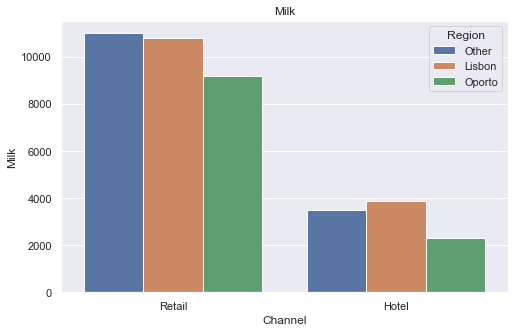

In [196]:
plt.figure(figsize=(8,5))
sns.barplot(x="Channel", y="Milk", hue ="Region", ci=None, data=ds)
plt.title('Milk')

Text(0.5, 1.0, 'Grocery')

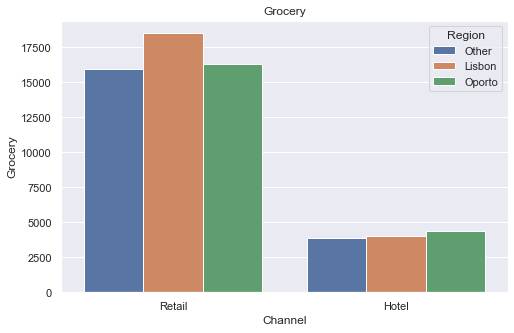

In [222]:
plt.figure(figsize=(8,5))
sns.barplot(x="Channel", y="Grocery", hue ="Region", ci=None, data=ds)
plt.title('Grocery')

Text(0.5, 1.0, 'Frozen')

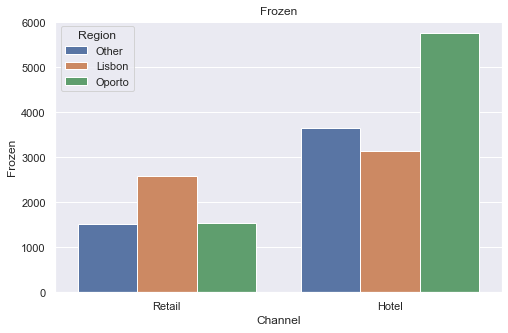

In [223]:
plt.figure(figsize=(8,5))
sns.barplot(x="Channel", y="Frozen", hue ="Region", ci=None, data=ds)
plt.title('Frozen')

Text(0.5, 1.0, 'Detergents_Paper')

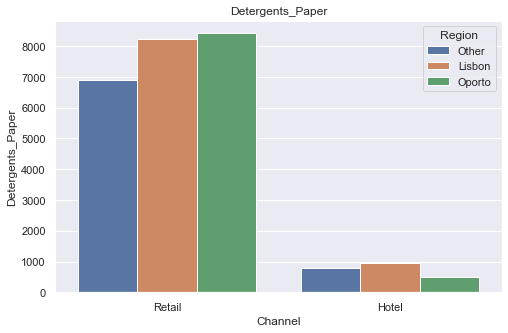

In [224]:
plt.figure(figsize=(8,5))
sns.barplot(x="Channel", y="Detergents_Paper", hue ="Region", ci=None, data=ds)
plt.title('Detergents_Paper')

Text(0.5, 1.0, 'Delicatessen')

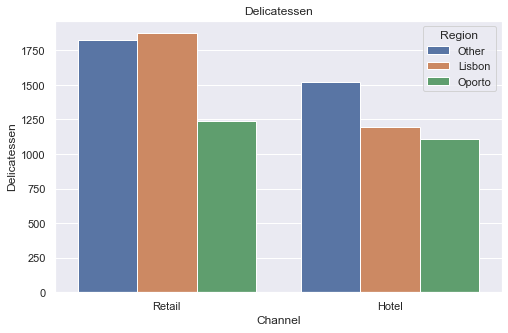

In [225]:
plt.figure(figsize=(8,5))
sns.barplot(x="Channel", y="Delicatessen", hue ="Region", ci=None, data=ds)
plt.title('Delicatessen')

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [252]:
all_prod_std = ds.drop(columns=['Buyer/Spender']).std()
all_prod_std.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

In [337]:
products = ds[ds.columns[+2:ds.columns.size]]
std=products.std().round(2)
std
#Retain any one

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

In [376]:
Fresh_CV =print('The Fresh_CV is',np.std(ds['Fresh']) / np.mean(ds['Fresh'])),
Milk_CV =print('The Milk_CV is',np.std(ds['Milk']) / np.mean(ds['Milk'])),
Grocery_CV =print('The Grocery_CV is',np.std(ds['Grocery']) / np.mean(ds['Grocery'])),
Frozen_CV=print('The Frozen_CV is',np.std(ds['Frozen']) / np.mean(ds['Frozen'])),
Detergents_Paper_CV=print('The Detergents_Paper_CV is',np.std(ds['Detergents_Paper']) / np.mean(ds['Detergents_Paper'])),
Delicatessen_CV=print('The Delicatessen_CV is',np.std(ds['Delicatessen']) / np.mean(ds['Delicatessen']))

The Fresh_CV is 1.0527196084948245
The Milk_CV is 1.2718508307424503
The Grocery_CV is 1.193815447749267
The Frozen_CV is 1.5785355298607762
The Detergents_Paper_CV is 1.6527657881041729
The Delicatessen_CV is 1.8473041039189306


In [297]:
variance=products.var()
variance

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [301]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fresh'),
  Text(1, 0, 'Milk'),
  Text(2, 0, 'Grocery'),
  Text(3, 0, 'Frozen'),
  Text(4, 0, 'Detergents_Paper'),
  Text(5, 0, 'Delicatessen')])

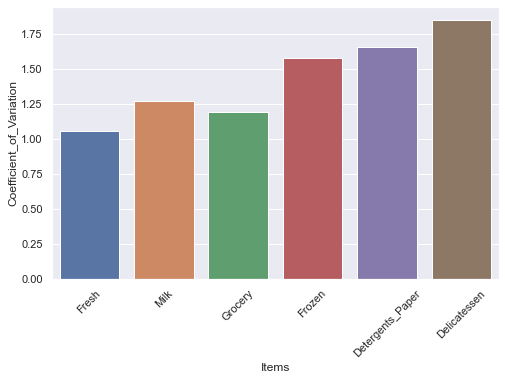

In [392]:
plt.figure(figsize=(8,5))
df = pd.DataFrame({
    'Items': ['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],
    'Coefficient_of_Variation':[1.052719608494824,1.2718508307424503,1.193815447749267,1.5785355298607762,1.6527657881041729,1.8473041039189306]
})
sns.barplot(x="Items", y="Coefficient_of_Variation", ci=None,data=df)
plt.xticks(rotation=45)

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

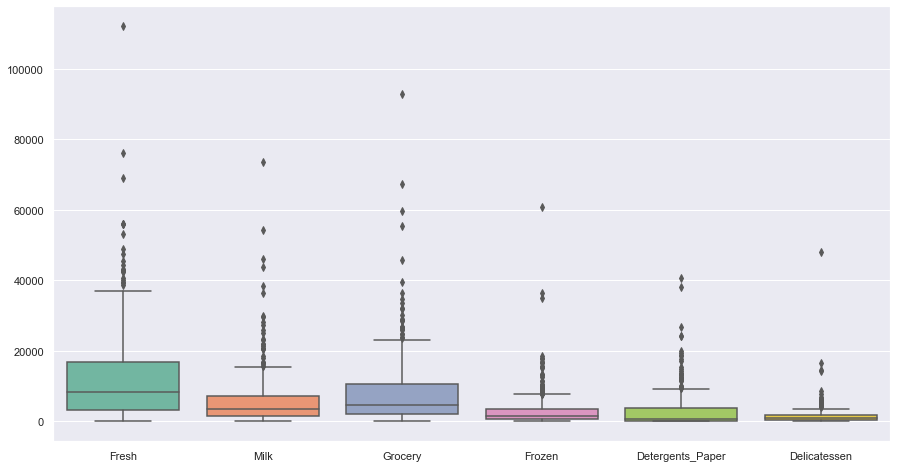

In [394]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="v", palette="Set2")

# Problem 2 
# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [951]:
ds1=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/SMDM/Project/Survey.csv')
ds1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [404]:
ds1.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [406]:
ds1.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [410]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.1.1. Gender and Major

In [474]:
pd.crosstab(ds1['Gender'],ds1['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


## 2.1.2. Gender and Grad Intention

In [475]:
pd.crosstab(ds1['Gender'],ds1['Grad Intention'], margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


## 2.1.3. Gender and Employment

In [476]:
pd.crosstab(ds1['Gender'],ds1['Employment'], margins = True )

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


## 2.1.4. Gender and Computer

In [530]:
pd.crosstab(ds1['Gender'],ds1['Computer'], margins = True )

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2 Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [416]:
# We consider n(s)= 62 as the given dataset has 62 values.
ds1.groupby(['Gender']).size()

Gender
Female    33
Male      29
dtype: int64

In [469]:
Male_Students= 29
Total_no_of_students = 62
print('The probability that a randomly selected CMSU student will be Male is',round(Male_Students/Total_no_of_students,4)*100,'%')

The probability that a randomly selected CMSU student will be Male is 46.77 %


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [470]:
Female_Students = 33
Total_no_of_students = 62
print('The probability that a randomly selected CMSU student will be Female is',round(Female_Students/Total_no_of_students,4)*100,'%')

The probability that a randomly selected CMSU student will be Female is 53.23 %


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [620]:
pd.crosstab(ds1['Gender'],ds1['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [571]:
#Out of 29 males 3 are undecided. So rest 26 of them are spread across different majors.
df2=round(pd.crosstab(ds1['Gender']=='Male',ds1['Major']).apply(lambda r: r/r.sum(), axis=1),4)*100
df3.drop(['Female'], axis = 0)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Male,13.79,3.45,13.79,6.9,20.69,13.79,17.24,10.34


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [569]:
#Out of 33 females none of them fall into undecided category. So rest 26 of them are spread across different majors.
df3=round(pd.crosstab(ds1['Gender'],ds1['Major']).apply(lambda r: r/r.sum(), axis=1),4)*100
df3.drop(['Male'], axis = 0)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,9.09,9.09,21.21,12.12,12.12,9.09,27.27,0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [608]:
pd.crosstab(ds1['Gender'],ds1['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [648]:
#student is a male and intends to graduate
df4=round(pd.crosstab(ds1['Gender'],ds1['Grad Intention']).apply(lambda r: r/r.sum(), axis=1),4)*100
df4.drop(['Female'], axis = 0)

Grad Intention,No,Undecided,Yes
Gender,,,
Male,10.34,31.03,58.62


In [1114]:
print('Randomly chosen student is a male and intends to graduate is 58.62%',)

Randomly chosen student is a male and intends to graduate is 58.62%


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [649]:
pd.crosstab(ds1['Gender'],ds1['Computer'], margins = True )

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [1108]:
#student is a female and does not have laptop
df5=(33-29)
print('No of female students without laptop is:',df5)

No of female students without laptop is: 4


In [1113]:
#randomly selected student is a female and does NOT have a laptop
female_no_laptop=round((4/33),5)*100
print('No of female students without laptop is',female_no_laptop,'%')

No of female students without laptop is 12.121 %


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [715]:
pd.crosstab(ds1['Gender'],ds1['Employment'], margins = True )

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [731]:
#student is a male OR has full-time employment
print('Probability that the student can be Male is (29/62)=',round((29/62),4)),
print('Probability that the student has full time employment is (10/62)=',round((10/62),4)),
print('Probability that the student can be Male and has full time employment is (7/62)=',round((7/62),4)),
print('Probability that the student can be Male OR has full time employment is',round((((29+10)-7)/62),4)*100,'%')

Probability that the student can be Male is (29/62)= 0.4677
Probability that the student has full time employment is (10/62)= 0.1613
Probability that the student can be Male and has full time employment is (7/62)= 0.1129
Probability that the student can be Male OR has full time employment is 51.61 %


## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [732]:
pd.crosstab(ds1['Gender'],ds1['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [1117]:
#The total number of female students = 33 
#The total number of female students who are majoring in International Business = 4 
#The total number of female students who are majoring in Management = 4
female_int_mngmnt=round((4+4)/33,3)*100
print('Probability that randomly chosen student is female and majoring in international business or management is',female_int_mngmnt,'%')

Probability that randomly chosen student is female and majoring in international business or management is 24.2 %


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [970]:
df6=pd.crosstab(ds1['Gender'],ds1['Grad Intention'],margins=False).drop(['Undecided'], axis = 1)
df6['Total'] = df6['No']+df6['Yes']
df6

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20


In [4]:
# Two events A and B can be proved to be Independent events when it satisfies the condition :P(A∩B) = P(A) * P(B)
#The Probability that a randomly selected student ‘being female’
#The Probability that a randomly selected student the graduate intention and being female
print('The Probability that a randomly selected student ‘being female’ is P(20/40)=',(20/40)*100)
print('The Probability of Grad Intention Yes is P(Yes Total/All Total)=P(28/40)=', (28/40)*100)
print('The Probability of Grad Intention Yes and being Female is P(Yes&Female/Total Female)=P(11/20)=',(11/20)*100)
print('The Probability of both the events are different.This suggests that the two events are independent.')

The Probability that a randomly selected student ‘being female’ is P(20/40)= 50.0
The Probability of Grad Intention Yes is P(Yes Total/All Total)=P(28/40)= 70.0
The Probability of Grad Intention Yes and being Female is P(Yes&Female/Total Female)=P(11/20)= 55.00000000000001
The Probability of both the events are different.This suggests that the two events are independent.


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [931]:
pd.crosstab(ds1['Gender'],ds1['GPA'],margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [930]:
print('Total number of the students are P(T) = 62')
print('Total number of the students having GPA less than 3 are P(G<3)=17')
print('Probability of his/her GPA is less than 3 =(Student_less_than_3/Total_student)=', round((17/62),4)*100,'%')

Total number of the students are P(T) = 62
Total number of the students having GPA less than 3 are P(G<3)=17
Probability of his/her GPA is less than 3 =(Student_less_than_3/Total_student)= 27.42 %


## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [952]:
pd.crosstab(ds1['Gender'],ds1['Salary'],margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [958]:
ds1['Salary1'] = np.where(ds1['Salary']>= 50, '50_or_more', 'Less_than_50')
pd.crosstab(ds1['Gender'],ds1['Salary1'], margins = True )

Salary1,50_or_more,Less_than_50,All
Gender,,,
Female,18,15,33
Male,14,15,29
All,32,30,62


In [966]:
print('Probability that a randomly selected Male earns 50 or more is 14/29=',round((14/29),4)*100,'%')
print('Probability that a randomly selected Female earns 50 or more is 18/33=',round((18/33),4)*100,'%')

Probability that a randomly selected Male earns 50 or more is 14/29= 48.28 %
Probability that a randomly selected Female earns 50 or more is 18/33= 54.55 %


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

<AxesSubplot:xlabel='GPA', ylabel='Density'>

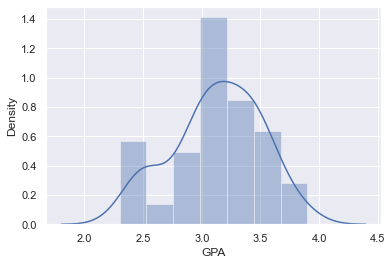

In [973]:
sns.distplot(ds1['GPA'], hist=True, kde=True)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

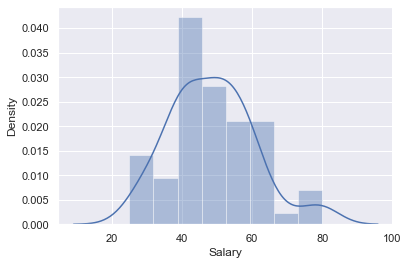

In [971]:
sns.distplot(ds1['Salary'], hist=True, kde=True)

<AxesSubplot:xlabel='Spending', ylabel='Density'>

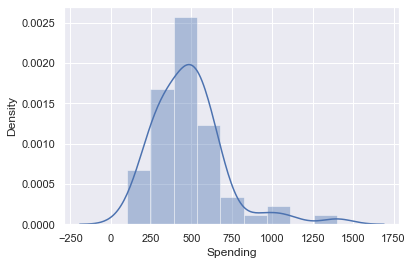

In [974]:
sns.distplot(ds1['Spending'], hist=True, kde=True)

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

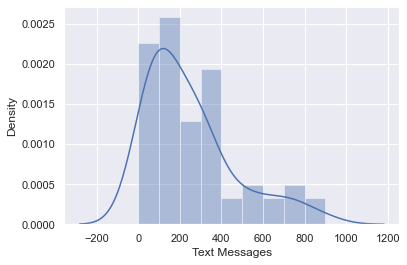

In [975]:
sns.distplot(ds1['Text Messages'], hist=True, kde=True)

In [979]:
ds1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [981]:
ds1.skew(axis = 0, skipna = True)

ID                   0.000000
Age                  0.736533
GPA                 -0.314600
Salary               0.534701
Social Networking    0.961056
Satisfaction        -0.505437
Spending             1.585915
Text Messages        1.295808
dtype: float64

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [987]:
ds2=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/SMDM/Project/A+&+B+shingles.csv')
ds2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [989]:
ds2.shape

(36, 2)

In [990]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [997]:
ds2.isnull().any()

A    False
B     True
dtype: bool

In [996]:
ds2.isnull().sum()
#there are no null values in column A but there are 5 NULL values in B column

A    0
B    5
dtype: int64

In [1020]:
# Alpha = 0.35
t_statistic, p_value = ttest_1samp(ds2['A'],0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, (p_value/2)))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [1076]:
t_statistic, p_value = ttest_1samp(ds2['B'],0.35,nan_policy='omit')#there are 5 NULL values and that are excluded.
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, (p_value/2)))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [1078]:
t_statistic, p_value =ttest_ind(ds2['A'],ds2['B'],equal_var= True,nan_policy='omit')
print('tstat %1.3f' % t_statistic)
print('p_value for one-tail',p_value)

tstat 1.290
p_value for one-tail 0.2017496571835306


In [1083]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("Two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis as p value < Level of significance')
    print('We conclude that mean/the population mean for shingles A and B are not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis as p value > Level of significance')
    print('We conclude that mean/the population mean for shingles A and B are equal.')

Two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis as p value > Level of significance
We conclude that mean/the population mean for shingles A and B are equal.
